# Dynamic Network Analysis of Enron Email Network Comparisons

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import random
from scipy.signal import *
from numpy.linalg import *
from sklearn.decomposition import *
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
#plotting parameters
%matplotlib inline
sns.set(style="whitegrid", color_codes=True, context='paper')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['CMU Serif']
rcParams['font.weight']=['heavy']
import matplotlib.pyplot as plt

In [4]:
plt.rc('axes', grid=False, titlesize='large', labelsize='large',labelweight='heavy')
plt.rc('lines', linewidth=4)
plt.rc('figure', figsize = (12,6),titlesize='large',titleweight='black')
plt.rc('font', weight='heavy', size=11)
plt.rc('grid',linewidth=5)

In [7]:
sns.set_palette(sns.cubehelix_palette(10, hue=0.3, reverse=True, rot=-0.55, dark=0.1))

# Get attribute data

In [71]:
lap = pd.read_excel('attribute_data/lap_att.xlsx')
adj = pd.read_excel('attribute_data/adj_att.xlsx')
mod = pd.read_excel('attribute_data/mod_att.xlsx')

In [72]:
lap.head()

,AvgDeg,AvgBet,AvgClo,AvgLoad,AvgKatz,AvgDensity,AvgAlgCon,AvgClustCoff,AvgEig,InstAmp,...,StatRat,MeanCurv,SubgraphStat,1-Zeta,LogKPCARatioChg,NormNMFRatioChg,NormFAbel,NRMS,RMS,Emergence
0,0.475524,1.000000,0.810523,0.475524,0.267944,-0.318532,1.0,-1.000000,0.177194,0.679834,...,0.407864,-0.242635,-1.000000,1.000000,-0.015620,-1.000000,-0.543745,0.000000,0.722464,0.000000
1,-0.027972,0.250903,0.509903,-0.027972,0.069435,-0.419219,1.0,-0.000165,-0.044891,0.305093,...,0.570795,-0.269438,0.766117,-0.766117,-0.059551,-0.573875,-0.352246,0.134441,0.551228,-0.205409
2,0.388112,1.000000,0.785809,0.388112,0.282044,-0.622808,1.0,-1.000000,-0.127797,0.450396,...,0.836955,-0.337965,0.873376,-0.873376,0.012093,-0.780922,-0.276008,0.045739,0.604070,0.390743
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,-1.000000,1.000000,1.000000,...,-1.000000,1.000000,0.421859,-0.421859,-0.079774,-0.869723,-1.000000,0.189878,0.887236,1.000000
4,0.559441,1.000000,0.835787,0.559441,0.423789,-0.054825,1.0,-1.000000,0.403160,0.860240,...,0.074177,0.108395,0.763599,-0.763599,0.019315,-0.673657,-0.702049,0.126025,0.688637,-0.972473


In [73]:
coldrop = lap.columns[:9]

In [74]:
lap.drop(coldrop, axis=1, inplace=True)
mod.drop(coldrop, axis=1, inplace=True)
adj.drop(coldrop, axis=1, inplace=True)

In [75]:
lap.head()

,InstAmp,InstPhase,InstFreq,Power,dInstAmp,d2InstAmp,InstAcc,cosInstPhase,A_wt_IF,A_wt_IP,...,StatRat,MeanCurv,SubgraphStat,1-Zeta,LogKPCARatioChg,NormNMFRatioChg,NormFAbel,NRMS,RMS,Emergence
0,0.679834,0.535455,-1.000000,0.021345,-0.565983,-0.539313,-0.707491,0.249334,-1.000000,0.796844,...,0.407864,-0.242635,-1.000000,1.000000,-0.015620,-1.000000,-0.543745,0.000000,0.722464,0.000000
1,0.305093,-0.578269,-0.393695,-0.364336,-0.587010,-0.455499,0.708190,-0.261313,-0.235448,-0.838336,...,0.570795,-0.269438,0.766117,-0.766117,-0.059551,-0.573875,-0.352246,0.134441,0.551228,-0.205409
2,0.450396,0.214700,-0.052958,-0.367204,-0.566478,-0.483079,-0.006052,-0.457223,0.015942,0.204171,...,0.836955,-0.337965,0.873376,-0.873376,0.012093,-0.780922,-0.276008,0.045739,0.604070,0.390743
3,1.000000,-0.207114,1.000000,1.000000,-0.560284,1.000000,0.103005,1.000000,1.000000,-0.359857,...,-1.000000,1.000000,0.421859,-0.421859,-0.079774,-0.869723,-1.000000,0.189878,0.887236,1.000000
4,0.860240,0.812100,-0.845407,0.340239,-1.000000,0.122943,-0.161020,0.560408,-0.708792,0.771960,...,0.074177,0.108395,0.763599,-0.763599,0.019315,-0.673657,-0.702049,0.126025,0.688637,-0.972473


In [76]:
mod.max()

InstAmp            1.000000
InstPhase          1.000000
InstFreq           1.000000
Power              1.000000
dInstAmp           1.000000
d2InstAmp          1.000000
InstAcc            1.000000
cosInstPhase       1.000000
A_wt_IF            1.000000
A_wt_IP            1.000000
PowerSpecDen       1.000000
ResDist            1.000000
ZeroCrossRate      1.000000
LogSpecCentroid    1.000000
StatRat            1.000000
MeanCurv           1.000000
SubgraphStat       1.000000
1-Zeta             1.000000
LogKPCARatioChg    1.000000
NormNMFRatioChg    1.000000
NormFAbel          1.000000
NRMS               0.193777
RMS                0.745719
Emergence          1.000000
dtype: float64

In [77]:
months = ['Nov98', 'Dec98', 'jan_99', 'feb_99', 'mar_99', 'apr_99', 'may_99', 'jun_99', 'jul_99', 'aug_99', 'sep_99', 'oct_99',\
          'nov_99', 'dec_99', 'jan_2k', 'feb_2k', 'mar_2k', 'apr_2k', 'may_2k', 'jun_2k', 'jul_2k', 'aug_2k', 'sep_2k', 'oct_2k',\
          'nov_2k', 'dec_2k', 'jan_2k1', 'feb_2k1', 'mar_2k1', 'apr_2k1', 'may_2k1', 'jun_2k1', 'jul_2k1', 'aug_2k1', 'sep_2k1',\
          'oct_2k1', 'nov_2k1', 'dec_2k1', 'jan_2k2', 'feb_2k2', 'mar_2k2', 'apr_2k2', 'may_2k2', 'jun_2k2']

In [78]:
att_only = lap.join(adj,rsuffix='_Adj').join(mod,rsuffix='_Mod')
att_only.sortlevel(axis=1, inplace=True);

In [79]:
att_only.head()

,1-Zeta,1-Zeta_Adj,1-Zeta_Mod,A_wt_IF,A_wt_IF_Adj,A_wt_IF_Mod,A_wt_IP,A_wt_IP_Adj,A_wt_IP_Mod,Emergence,...,ZeroCrossRate_Mod,cosInstPhase,cosInstPhase_Adj,cosInstPhase_Mod,d2InstAmp,d2InstAmp_Adj,d2InstAmp_Mod,dInstAmp,dInstAmp_Adj,dInstAmp_Mod
0,1.000000,1.000000,1.000000,-1.000000,-0.065973,-0.578144,0.796844,0.402595,0.448481,0.000000,...,-1.000000,0.249334,0.912276,0.869867,-0.539313,-0.741787,-0.070128,-0.565983,0.375510,0.197628
1,-0.766117,-0.500770,-0.562061,-0.235448,0.000403,-0.270839,-0.838336,-1.000000,-1.000000,-0.205409,...,-0.904762,-0.261313,-0.339427,-0.038949,-0.455499,-0.811824,0.594556,-0.587010,0.465306,0.007620
2,-0.873376,-0.808032,-0.688113,0.015942,-0.065973,-0.578144,0.204171,1.000000,0.448481,0.390743,...,-0.952381,-0.457223,-0.597742,0.009933,-0.483079,-0.602222,-0.070128,-0.566478,0.375510,0.197628
3,-0.421859,-0.009407,0.339333,1.000000,-0.065973,-0.578144,-0.359857,-0.245437,0.448481,1.000000,...,-0.952381,1.000000,0.795405,0.243197,1.000000,1.000000,-0.070128,-0.560284,0.375510,0.197628
4,-0.763599,-0.427517,-0.195048,-0.708792,0.101108,-0.578144,0.771960,-0.359158,0.448481,-0.972473,...,-0.952381,0.560408,0.741131,1.000000,0.122943,0.342754,-0.070128,-1.000000,-0.107077,0.197628


In [106]:
snr_lap = lap.mean()/lap.std()
snr_mod = mod.mean()/mod.std()
snr_adj = adj.mean()/adj.std()

In [111]:
snr_df = pd.DataFrame([snr_lap,snr_mod,snr_adj])

In [114]:
cname =  ['Laplacian','Modularity','Adjacency']

In [129]:
snr_df =  snr_df.T
snr_df.columns = cname
snr_df.sortlevel(inplace=True)

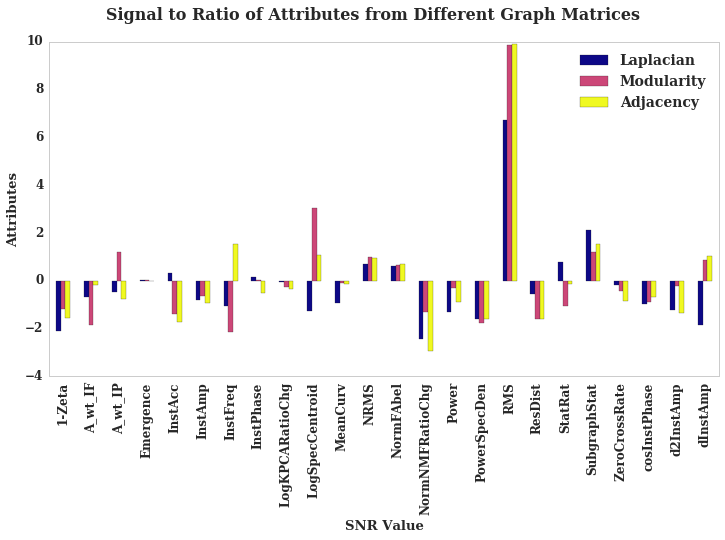

In [248]:
snr_df.plot.bar(figsize=(12,6), fontsize=12,cmap='plasma')
plt.suptitle("Signal to Ratio of Attributes from Different Graph Matrices", fontsize=16)
plt.legend(fontsize=14)
plt.xlabel('SNR Value')
plt.ylabel('Attributes')
plt.savefig('images/snr_allatt_3mat.png')

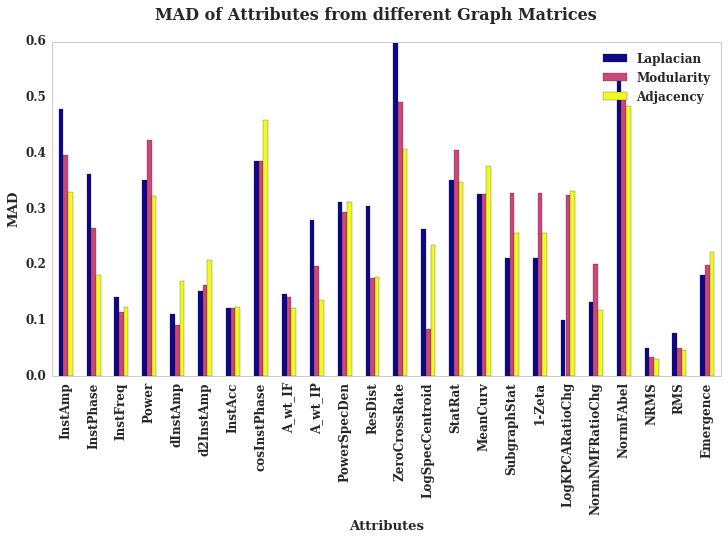

In [247]:
mad_lap = lap.mad()
mad_adj = adj.mad()
mad_mod = mod.mad()

mad_all = pd.DataFrame([mad_lap,mad_mod,mad_adj]).T
mad_all.columns = ['Laplacian','Modularity','Adjacency']

mad_all.plot.bar(fontsize=12, cmap='plasma',figsize=(12,6))
plt.suptitle('MAD of Attributes from different Graph Matrices', fontsize=16)
plt.xlabel('Attributes')
plt.ylabel('MAD')
plt.legend(loc=1,fontsize=12)
plt.savefig('images/mad_allatt_3mat.png')

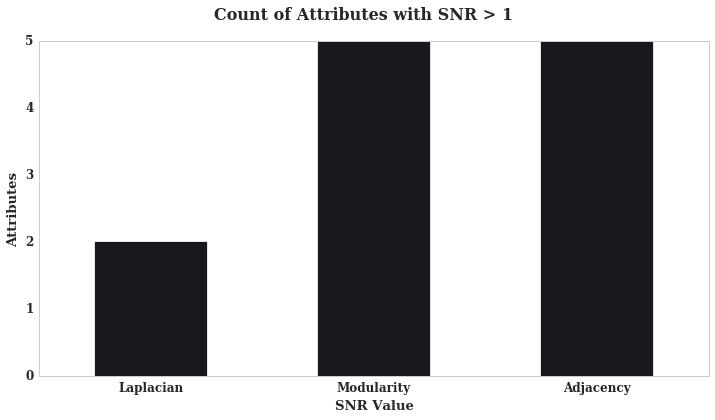

In [232]:
snr_df[snr_df > 1].count().plot.bar(rot=0, fontsize=12)
plt.suptitle("Count of Attributes with SNR > 1", fontsize=16)
plt.xlabel('SNR Value')
plt.ylabel('Attributes')
plt.savefig('images/snrcount.png')

In [164]:
mad_all.max()/2

Laplacian     0.299199
Modularity    0.252281
Adjacency     0.242036
dtype: float64

In [168]:
 att_only.columns[36:39]

Index(['NormFAbel', 'NormFAbel_Adj', 'NormFAbel_Mod'], dtype='object')

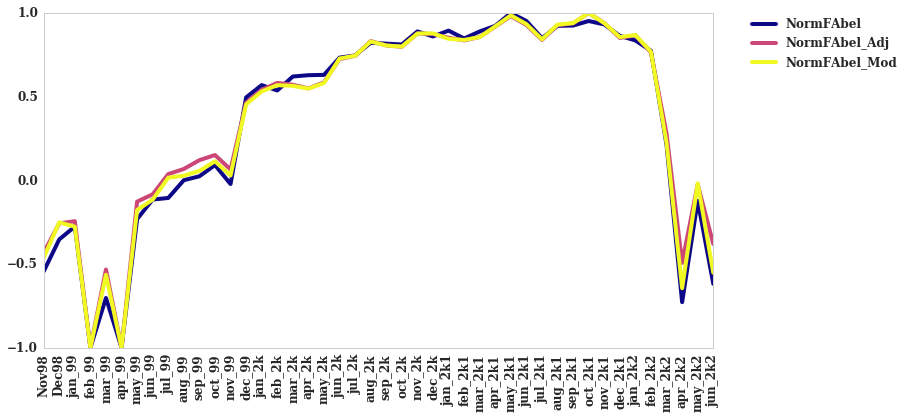

In [187]:
att_only.iloc[:,36:39].plot.line(fontsize=12,cmap='plasma',rot=90)
plt.xticks(np.arange(len(months)), months);
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [175]:
att_only.columns[18:21]

Index(['InstFreq', 'InstFreq_Adj', 'InstFreq_Mod'], dtype='object')

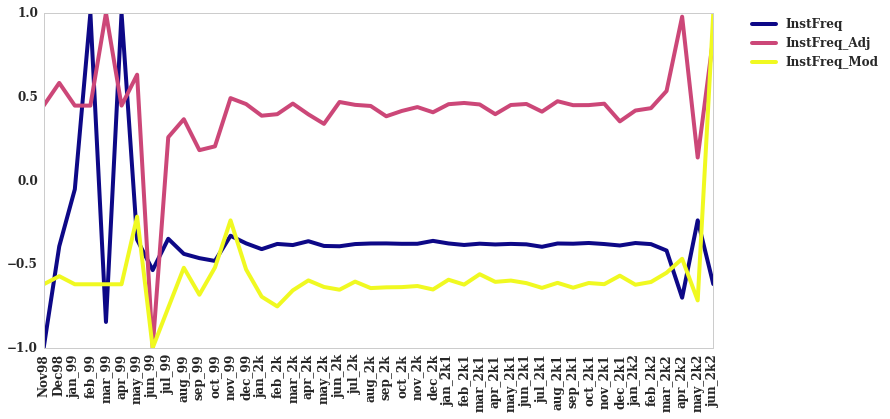

In [186]:
att_only.iloc[:,18:21].plot.line(fontsize=12,cmap='plasma', rot=90)
plt.xticks(np.arange(len(months)), months);
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [195]:
from sklearn.preprocessing import *

In [201]:
px_lap = lap.apply(lambda x: minmax_scale(x, feature_range=[0,1]))
px_mod = mod.apply(lambda x: minmax_scale(x, feature_range=[0,1]))
px_adj = adj.apply(lambda x: minmax_scale(x, feature_range=[0,1]))

In [202]:
ent_lap = -1* np.sum(px_lap*np.log2(px_lap))
ent_mod = -1* np.sum(px_mod*np.log2(px_mod))
ent_adj = -1* np.sum(px_adj*np.log2(px_adj))

In [203]:
entropy_df = pd.DataFrame([ent_lap,ent_mod,ent_adj]).T
entropy_df.columns = ['Laplacian','Modularity','Adjacency']

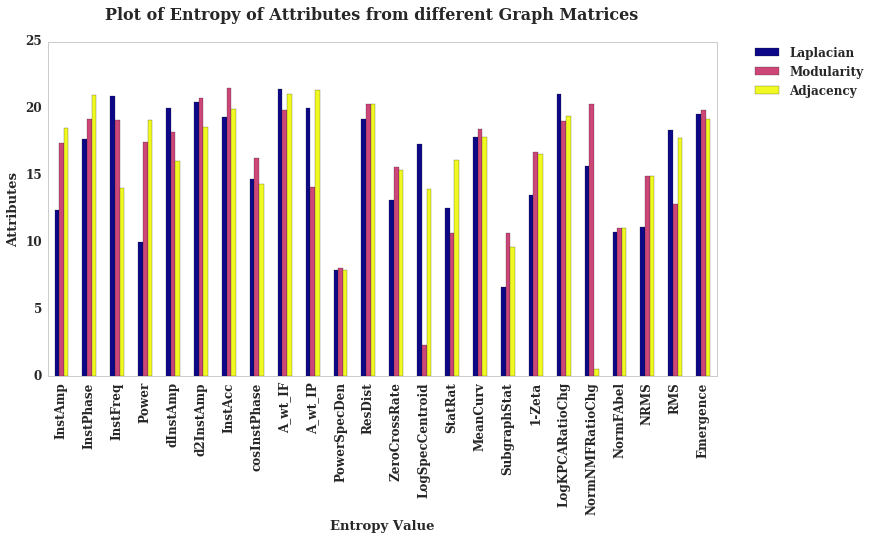

In [243]:
entropy_df.plot.bar(figsize=(12,6), fontsize=12,cmap='plasma')
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("Plot of Entropy of Attributes from different Graph Matrices", fontsize=16)
plt.xlabel('Entropy Value')
plt.ylabel('Attributes')
plt.savefig('images/entropy.png')

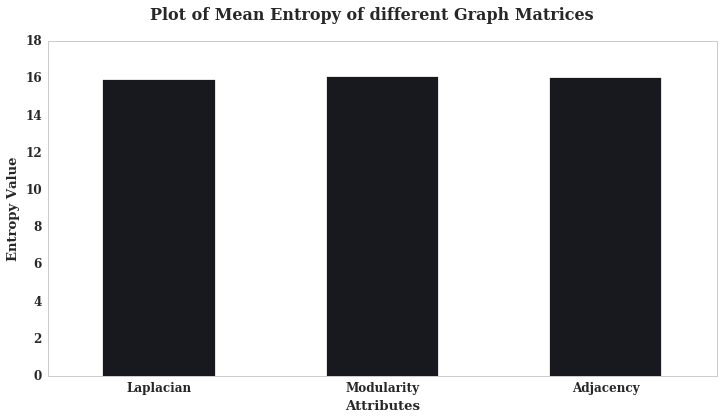

In [234]:
entropy_df.mean().plot.bar(legend=False,fontsize=12, rot=0)
plt.suptitle("Plot of Mean Entropy of different Graph Matrices", fontsize=16)
plt.ylabel('Entropy Value')
plt.xlabel('Attributes')
plt.savefig('images/entropy_mean.png')